In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)
plt.style.use('dark_background')

# Cargar datos
df = pd.read_csv('../data/netflix_titles.csv')
print(f"📁 Dataset cargado: {df.shape[0]} filas x {df.shape[1]} columnas")

📁 Dataset cargado: 8807 filas x 12 columnas


## 1️⃣ Vista General del Dataset

In [4]:
# Primeras filas
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno ...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swi..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noure...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Action & Adventure","To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robb..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down among the incarcerated women at the Orleans Justice C..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam Khan, Ahsaas Channa, Revathi Pillai, Urvi Singh, Ar...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV Comedies","In a city of coaching centers known to train India’s finest collegiate minds, an earnest but une..."


In [5]:
# Info del dataset
print("📋 INFORMACIÓN DEL DATASET")
print("=" * 50)
df.info()

📋 INFORMACIÓN DEL DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
# Estadísticas descriptivas
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s8807,Movie,Zubaan,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned property alarms a group eager to redevelop the site, bu..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


## 2️⃣ Análisis de Valores Nulos

Esto es CRÍTICO para saber qué columnas podemos usar en el modelo.

In [7]:
# Conteo de nulos
null_counts = df.isnull().sum()
null_percent = (df.isnull().sum() / len(df) * 100).round(2)

null_analysis = pd.DataFrame({
    'Columna': df.columns,
    'Nulos': null_counts.values,
    'Porcentaje (%)': null_percent.values,
    'No Nulos': (len(df) - null_counts).values
}).sort_values('Porcentaje (%)', ascending=False)

print("🔍 ANÁLISIS DE VALORES NULOS")
print("=" * 60)
null_analysis

🔍 ANÁLISIS DE VALORES NULOS


,Columna,Nulos,Porcentaje (%),No Nulos
3,director,2634,29.91,6173
5,country,831,9.44,7976
4,cast,825,9.37,7982
6,date_added,10,0.11,8797
8,rating,4,0.05,8803
9,duration,3,0.03,8804
0,show_id,0,0.00,8807
1,type,0,0.00,8807
2,title,0,0.00,8807
7,release_year,0,0.00,8807


C:\Users\twofi\AppData\Local\Temp\ipykernel_24968\4214652183.py:15: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\twofi\miniconda3\envs\netflix_clean\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


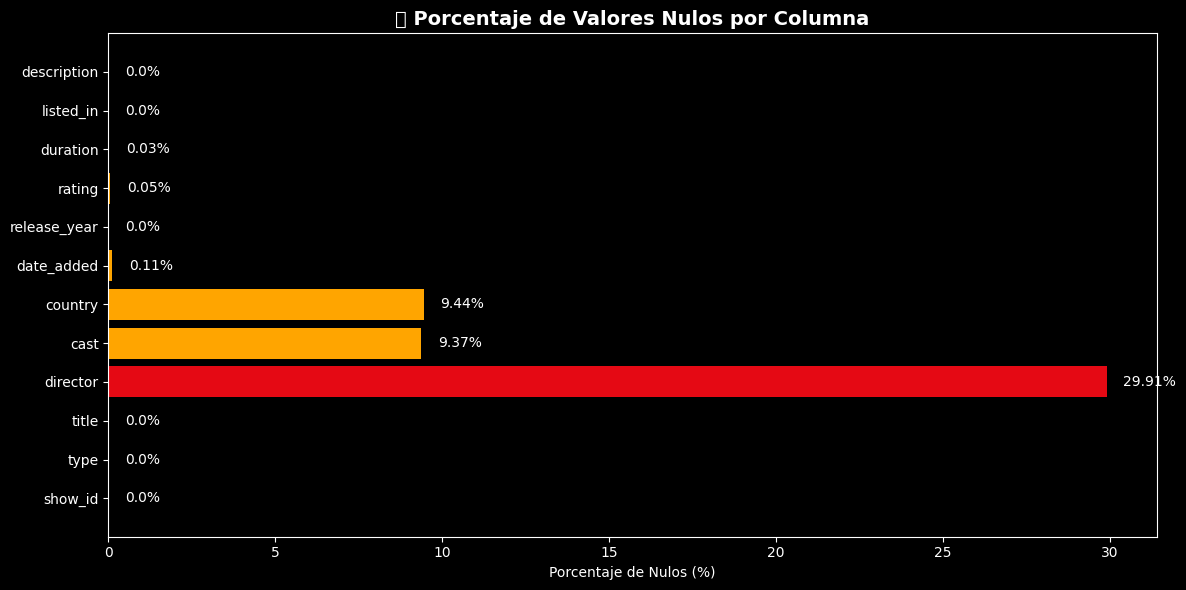


🎯 INTERPRETACIÓN:
  🟢 Verde: 0% nulos - Perfectas para usar
  🟠 Naranja: <10% nulos - Usar con precaución
  🔴 Rojo: >10% nulos - Requieren tratamiento especial


In [8]:
# Visualización de nulos
fig, ax = plt.subplots(figsize=(12, 6))

colors = ['#e50914' if p > 10 else '#4CAF50' if p == 0 else '#FFA500' for p in null_percent.values]

bars = ax.barh(df.columns, null_percent.values, color=colors)
ax.set_xlabel('Porcentaje de Nulos (%)')
ax.set_title('📊 Porcentaje de Valores Nulos por Columna', fontsize=14, fontweight='bold')

# Añadir etiquetas
for bar, val in zip(bars, null_percent.values):
    ax.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, 
            f'{val}%', va='center', fontsize=10)

plt.tight_layout()
plt.show()

print("\n🎯 INTERPRETACIÓN:")
print("  🟢 Verde: 0% nulos - Perfectas para usar")
print("  🟠 Naranja: <10% nulos - Usar con precaución")
print("  🔴 Rojo: >10% nulos - Requieren tratamiento especial")

## 3️⃣ Análisis de Cada Columna

Vamos a analizar cada columna para determinar su utilidad en el modelo de recomendación.

📺 ANÁLISIS DE 'type'
type
Movie      6131
TV Show    2676
Name: count, dtype: int64

✅ Útil para: Filtrar recomendaciones por tipo


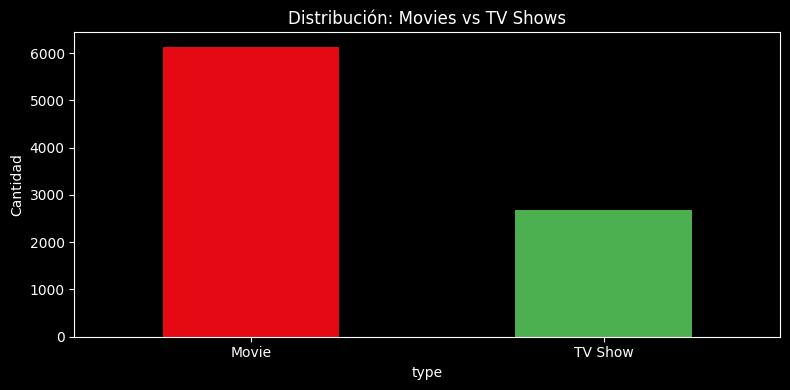

In [9]:
# Análisis de 'type' (Movie vs TV Show)
print("📺 ANÁLISIS DE 'type'")
print("=" * 40)
print(df['type'].value_counts())
print(f"\n✅ Útil para: Filtrar recomendaciones por tipo")

# Gráfico
fig, ax = plt.subplots(figsize=(8, 4))
df['type'].value_counts().plot(kind='bar', color=['#e50914', '#4CAF50'], ax=ax)
ax.set_title('Distribución: Movies vs TV Shows')
ax.set_ylabel('Cantidad')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [10]:
# Análisis de 'director'
print("🎬 ANÁLISIS DE 'director'")
print("=" * 40)
print(f"Valores únicos: {df['director'].nunique()}")
print(f"Nulos: {df['director'].isnull().sum()} ({df['director'].isnull().sum()/len(df)*100:.1f}%)")
print("\nTop 10 directores más frecuentes:")
print(df['director'].value_counts().head(10))

print(f"\n⚠️ PROBLEMA: {df['director'].isnull().sum()/len(df)*100:.1f}% de nulos")
print("💡 SOLUCIÓN: Usar cuando esté disponible, si no, ignorar")

🎬 ANÁLISIS DE 'director'
Valores únicos: 4528
Nulos: 2634 (29.9%)

Top 10 directores más frecuentes:
director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Name: count, dtype: int64

⚠️ PROBLEMA: 29.9% de nulos
💡 SOLUCIÓN: Usar cuando esté disponible, si no, ignorar


In [11]:
# Análisis de 'cast'
print("🌟 ANÁLISIS DE 'cast'")
print("=" * 40)
print(f"Nulos: {df['cast'].isnull().sum()} ({df['cast'].isnull().sum()/len(df)*100:.1f}%)")

# Extraer actores individuales
all_actors = []
for cast in df['cast'].dropna():
    actors = [a.strip() for a in str(cast).split(',')]
    all_actors.extend(actors)

actor_counts = pd.Series(all_actors).value_counts()
print(f"\nActores únicos: {len(actor_counts)}")
print("\nTop 15 actores más frecuentes:")
print(actor_counts.head(15))

print(f"\n💡 UTILIDAD: Alta - Películas con mismo actor pueden ser similares")

🌟 ANÁLISIS DE 'cast'
Nulos: 825 (9.4%)

Actores únicos: 36439

Top 15 actores más frecuentes:
Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Takahiro Sakurai    32
Naseeruddin Shah    32
Rupa Bhimani        31
Akshay Kumar        30
Om Puri             30
Yuki Kaji           29
Paresh Rawal        28
Amitabh Bachchan    28
Boman Irani         27
Vincent Tong        26
Rajesh Kava         26
Andrea Libman       25
Name: count, dtype: int64

💡 UTILIDAD: Alta - Películas con mismo actor pueden ser similares


🌍 ANÁLISIS DE 'country'
Nulos: 831 (9.4%)

Países únicos: 123

Top 10 países:
United States     3690
India             1046
United Kingdom     806
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Mexico             169
Name: count, dtype: int64


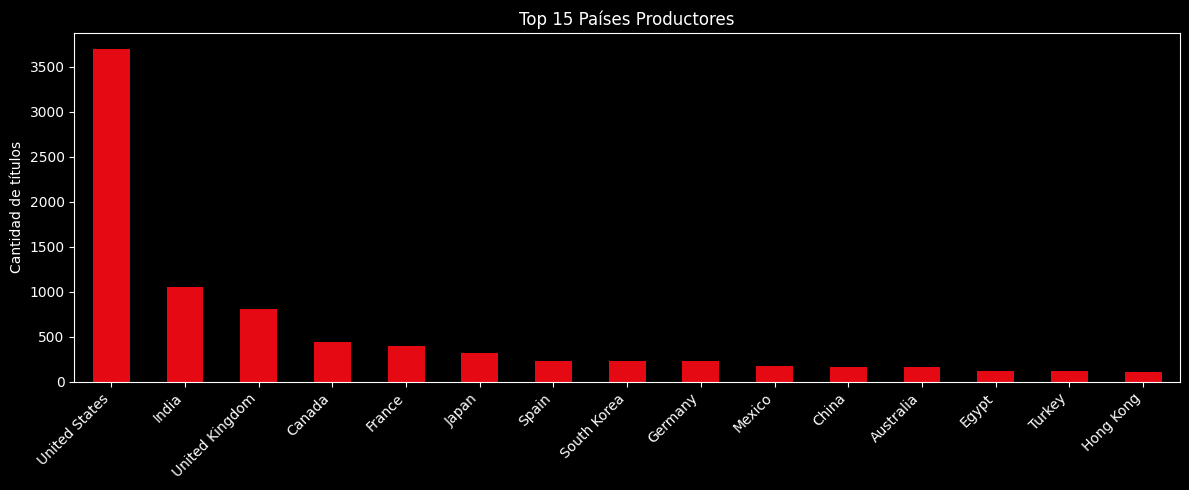

In [12]:
# Análisis de 'country'
print("🌍 ANÁLISIS DE 'country'")
print("=" * 40)
print(f"Nulos: {df['country'].isnull().sum()} ({df['country'].isnull().sum()/len(df)*100:.1f}%)")

# Extraer países (puede haber múltiples)
all_countries = []
for country in df['country'].dropna():
    countries = [c.strip() for c in str(country).split(',')]
    all_countries.extend(countries)

country_counts = pd.Series(all_countries).value_counts()
print(f"\nPaíses únicos: {len(country_counts)}")
print("\nTop 10 países:")
print(country_counts.head(10))

# Gráfico
fig, ax = plt.subplots(figsize=(12, 5))
country_counts.head(15).plot(kind='bar', color='#e50914', ax=ax)
ax.set_title('Top 15 Países Productores')
ax.set_ylabel('Cantidad de títulos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

🏷️ ANÁLISIS DE 'listed_in' (Géneros)
Nulos: 0

Géneros únicos: 42

Todos los géneros:
International Movies            2752
Dramas                          2427
Comedies                        1674
International TV Shows          1351
Documentaries                    869
Action & Adventure               859
TV Dramas                        763
Independent Movies               756
Children & Family Movies         641
Romantic Movies                  616
TV Comedies                      581
Thrillers                        577
Crime TV Shows                   470
Kids' TV                         451
Docuseries                       395
Music & Musicals                 375
Romantic TV Shows                370
Horror Movies                    357
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 253
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     176
Spanish-Language TV Shows 

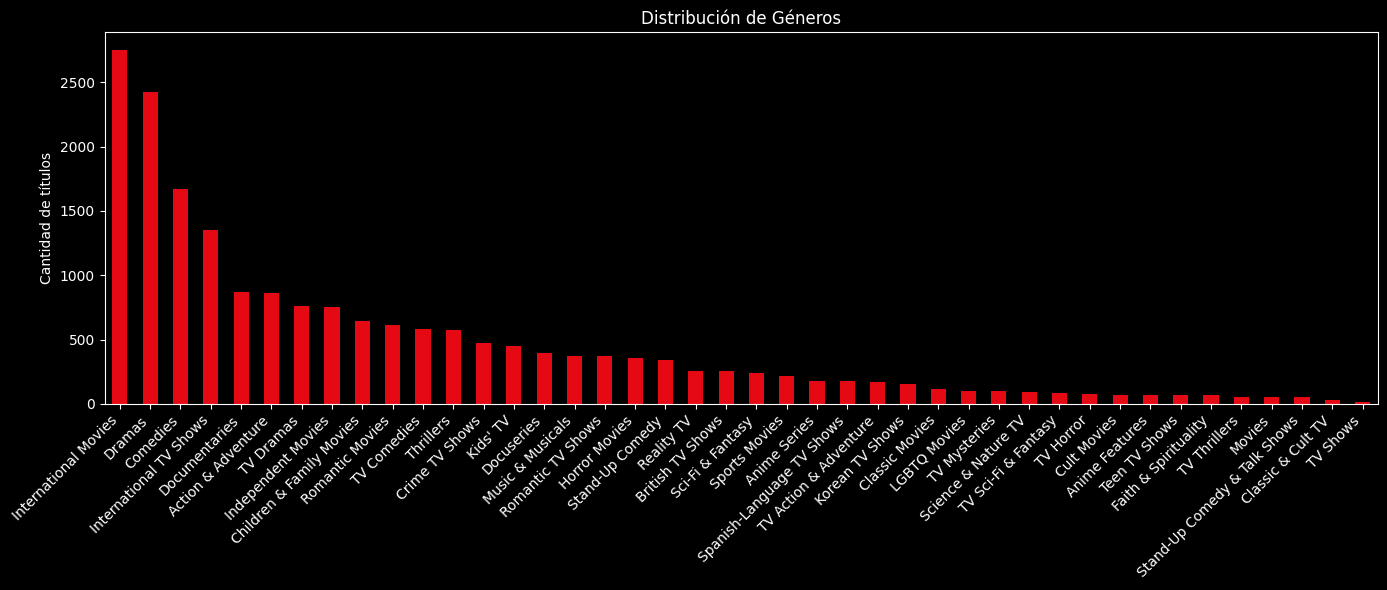


✅ UTILIDAD: MUY ALTA - Esencial para clasificación y recomendación


In [13]:
# Análisis de 'listed_in' (Géneros)
print("🏷️ ANÁLISIS DE 'listed_in' (Géneros)")
print("=" * 40)
print(f"Nulos: {df['listed_in'].isnull().sum()}")

# Extraer géneros individuales
all_genres = []
for genres in df['listed_in'].dropna():
    genre_list = [g.strip() for g in str(genres).split(',')]
    all_genres.extend(genre_list)

genre_counts = pd.Series(all_genres).value_counts()
print(f"\nGéneros únicos: {len(genre_counts)}")
print("\nTodos los géneros:")
print(genre_counts)

# Gráfico
fig, ax = plt.subplots(figsize=(14, 6))
genre_counts.plot(kind='bar', color='#e50914', ax=ax)
ax.set_title('Distribución de Géneros')
ax.set_ylabel('Cantidad de títulos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(f"\n✅ UTILIDAD: MUY ALTA - Esencial para clasificación y recomendación")

📝 ANÁLISIS DE 'description'
Nulos: 0

Estadísticas de longitud (caracteres):
count    8807.000000
mean      143.303395
std        10.335027
min        61.000000
25%       140.000000
50%       146.000000
75%       149.000000
max       248.000000
Name: desc_length, dtype: float64

Estadísticas de longitud (palabras):
count    8807.000000
mean       23.882253
std         2.836704
min        10.000000
25%        22.000000
50%        24.000000
75%        26.000000
max        48.000000
Name: desc_words, dtype: float64


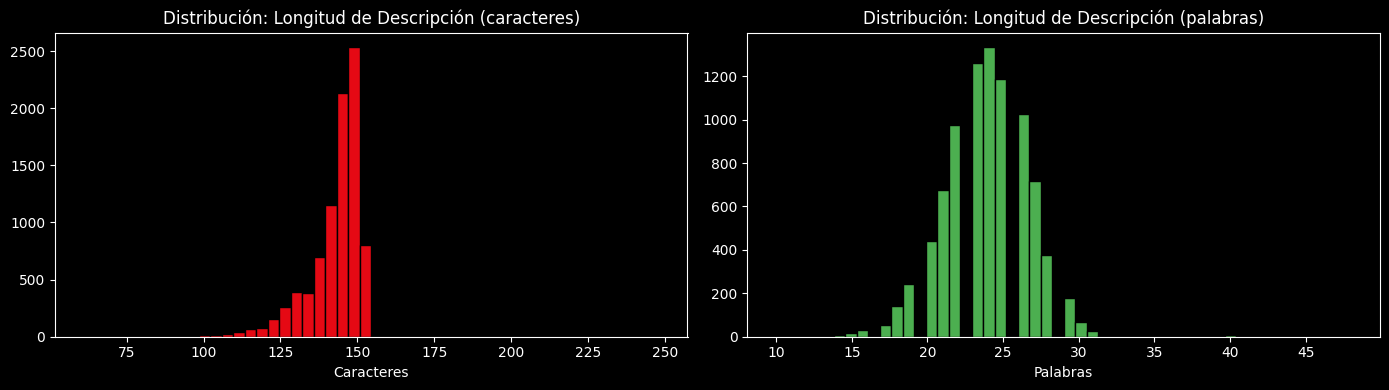


✅ UTILIDAD: CRÍTICA - Es la columna más importante para NLP


In [14]:
# Análisis de 'description'
print("📝 ANÁLISIS DE 'description'")
print("=" * 40)
print(f"Nulos: {df['description'].isnull().sum()}")

# Longitud de descripciones
df['desc_length'] = df['description'].fillna('').apply(len)
df['desc_words'] = df['description'].fillna('').apply(lambda x: len(x.split()))

print(f"\nEstadísticas de longitud (caracteres):")
print(df['desc_length'].describe())

print(f"\nEstadísticas de longitud (palabras):")
print(df['desc_words'].describe())

# Histograma
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

axes[0].hist(df['desc_length'], bins=50, color='#e50914', edgecolor='black')
axes[0].set_title('Distribución: Longitud de Descripción (caracteres)')
axes[0].set_xlabel('Caracteres')

axes[1].hist(df['desc_words'], bins=50, color='#4CAF50', edgecolor='black')
axes[1].set_title('Distribución: Longitud de Descripción (palabras)')
axes[1].set_xlabel('Palabras')

plt.tight_layout()
plt.show()

print(f"\n✅ UTILIDAD: CRÍTICA - Es la columna más importante para NLP")

⭐ ANÁLISIS DE 'rating' (Clasificación por edades)
Nulos: 4 (0.0%)

Distribución de ratings:
rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64


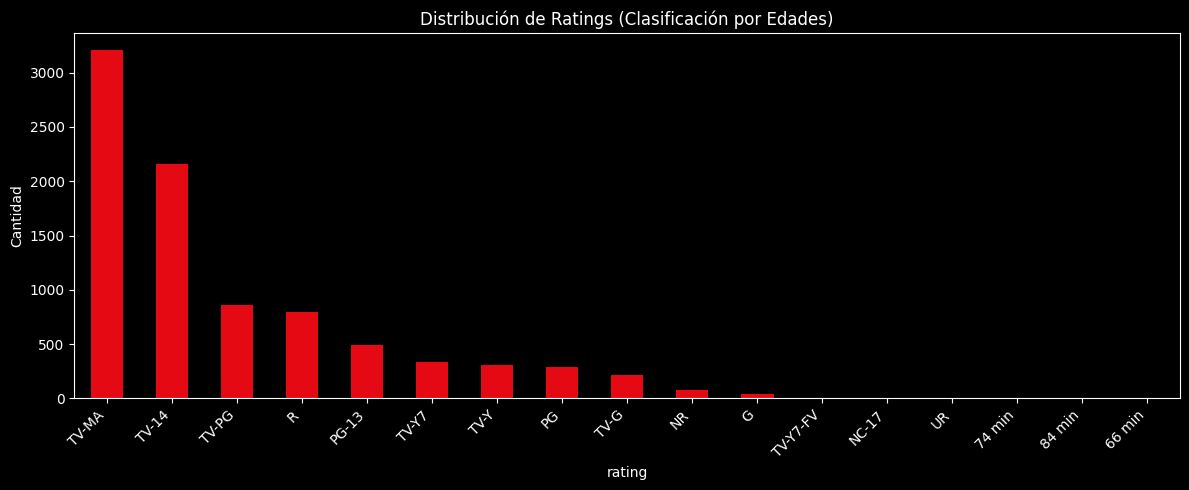


💡 UTILIDAD: Media - Útil para filtrar por audiencia


In [15]:
# Análisis de 'rating'
print("⭐ ANÁLISIS DE 'rating' (Clasificación por edades)")
print("=" * 40)
print(f"Nulos: {df['rating'].isnull().sum()} ({df['rating'].isnull().sum()/len(df)*100:.1f}%)")
print("\nDistribución de ratings:")
print(df['rating'].value_counts())

# Gráfico
fig, ax = plt.subplots(figsize=(12, 5))
df['rating'].value_counts().plot(kind='bar', color='#e50914', ax=ax)
ax.set_title('Distribución de Ratings (Clasificación por Edades)')
ax.set_ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(f"\n💡 UTILIDAD: Media - Útil para filtrar por audiencia")

📅 ANÁLISIS DE 'release_year'
Nulos: 0

Rango: 1925 - 2021


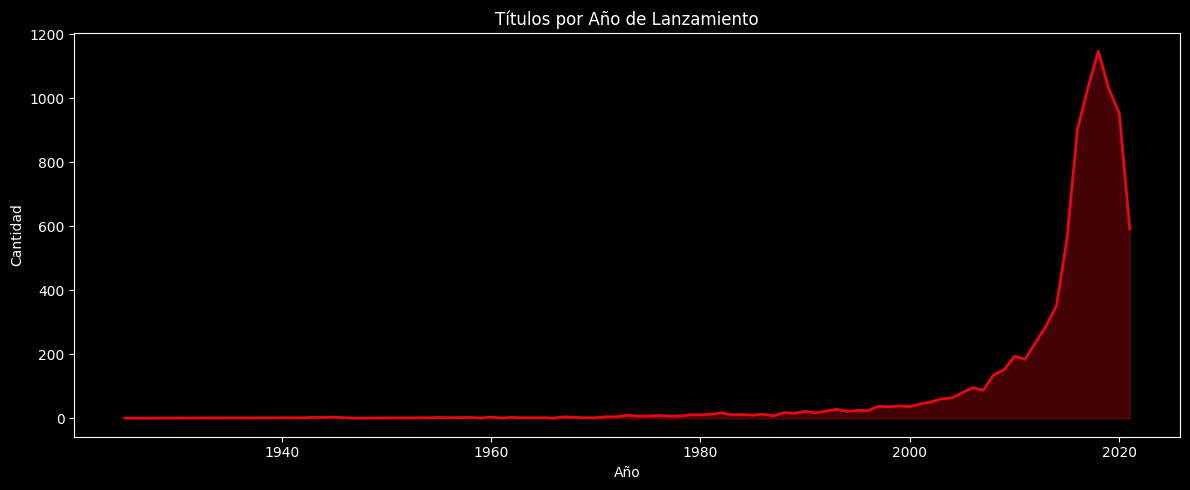


💡 UTILIDAD: Baja para similitud, útil para filtrar


In [16]:
# Análisis de 'release_year'
print("📅 ANÁLISIS DE 'release_year'")
print("=" * 40)
print(f"Nulos: {df['release_year'].isnull().sum()}")
print(f"\nRango: {df['release_year'].min()} - {df['release_year'].max()}")

# Distribución por década
df['decade'] = (df['release_year'] // 10 * 10).astype(int)

fig, ax = plt.subplots(figsize=(12, 5))
df['release_year'].value_counts().sort_index().plot(kind='line', color='#e50914', ax=ax, linewidth=2)
ax.fill_between(df['release_year'].value_counts().sort_index().index, 
                df['release_year'].value_counts().sort_index().values, alpha=0.3, color='#e50914')
ax.set_title('Títulos por Año de Lanzamiento')
ax.set_xlabel('Año')
ax.set_ylabel('Cantidad')
plt.tight_layout()
plt.show()

print(f"\n💡 UTILIDAD: Baja para similitud, útil para filtrar")

⏱️ ANÁLISIS DE 'duration'
Nulos: 3 (0.0%)

🎬 PELÍCULAS (duración en minutos):
count    6128.000000
mean       99.577187
std        28.290593
min         3.000000
25%        87.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration_min, dtype: float64

📺 TV SHOWS (número de temporadas):
count    2676.000000
mean        1.764948
std         1.582752
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        17.000000
Name: duration_seasons, dtype: float64


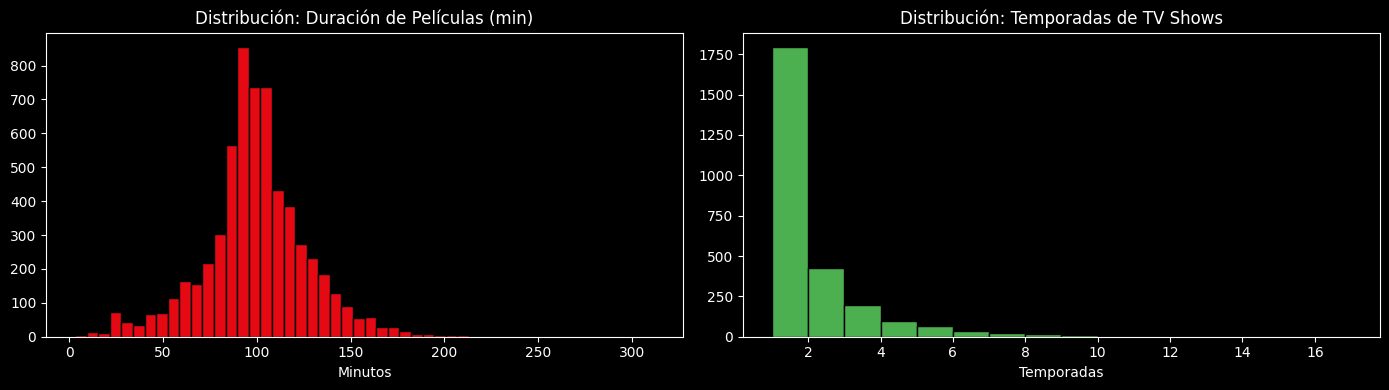

In [17]:
# Análisis de 'duration'
print("⏱️ ANÁLISIS DE 'duration'")
print("=" * 40)
print(f"Nulos: {df['duration'].isnull().sum()} ({df['duration'].isnull().sum()/len(df)*100:.1f}%)")

# Separar películas y series
movies = df[df['type'] == 'Movie'].copy()
tv_shows = df[df['type'] == 'TV Show'].copy()

# Extraer duración numérica
movies['duration_min'] = movies['duration'].str.extract('(\d+)').astype(float)
tv_shows['duration_seasons'] = tv_shows['duration'].str.extract('(\d+)').astype(float)

print("\n🎬 PELÍCULAS (duración en minutos):")
print(movies['duration_min'].describe())

print("\n📺 TV SHOWS (número de temporadas):")
print(tv_shows['duration_seasons'].describe())

fig, axes = plt.subplots(1, 2, figsize=(14, 4))

axes[0].hist(movies['duration_min'].dropna(), bins=50, color='#e50914', edgecolor='black')
axes[0].set_title('Distribución: Duración de Películas (min)')
axes[0].set_xlabel('Minutos')

axes[1].hist(tv_shows['duration_seasons'].dropna(), bins=range(1, 18), color='#4CAF50', edgecolor='black')
axes[1].set_title('Distribución: Temporadas de TV Shows')
axes[1].set_xlabel('Temporadas')

plt.tight_layout()
plt.show()

## 4️⃣ Resumen: ¿Qué Columnas Usar para el Modelo?

Basándonos en el análisis, vamos a clasificar las columnas.

In [18]:
# Resumen de utilidad
resumen = pd.DataFrame({
    'Columna': ['description', 'listed_in', 'cast', 'director', 'country', 'type', 'rating', 'release_year', 'duration', 'title', 'date_added', 'show_id'],
    'Nulos (%)': [
        df['description'].isnull().sum()/len(df)*100,
        df['listed_in'].isnull().sum()/len(df)*100,
        df['cast'].isnull().sum()/len(df)*100,
        df['director'].isnull().sum()/len(df)*100,
        df['country'].isnull().sum()/len(df)*100,
        df['type'].isnull().sum()/len(df)*100,
        df['rating'].isnull().sum()/len(df)*100,
        df['release_year'].isnull().sum()/len(df)*100,
        df['duration'].isnull().sum()/len(df)*100,
        df['title'].isnull().sum()/len(df)*100,
        df['date_added'].isnull().sum()/len(df)*100,
        df['show_id'].isnull().sum()/len(df)*100
    ],
    'Utilidad para NLP': [
        '⭐⭐⭐⭐⭐ CRÍTICA', 
        '⭐⭐⭐⭐⭐ MUY ALTA', 
        '⭐⭐⭐⭐ ALTA', 
        '⭐⭐⭐ MEDIA', 
        '⭐⭐ BAJA',
        '⭐⭐ FILTRO',
        '⭐⭐ FILTRO',
        '⭐ BAJA',
        '⭐ BAJA',
        '⭐⭐⭐ ID',
        '❌ NO ÚTIL',
        '❌ NO ÚTIL'
    ],
    'Usar en Texto Enriquecido': [
        '✅ SÍ - Base principal',
        '✅ SÍ - Añadir géneros',
        '✅ SÍ - Si disponible',
        '✅ SÍ - Si disponible',
        '⚠️ OPCIONAL',
        '❌ NO - Solo filtro',
        '❌ NO - Solo filtro',
        '❌ NO',
        '❌ NO',
        '❌ NO - Identificador',
        '❌ NO',
        '❌ NO'
    ]
})

print("📊 RESUMEN DE UTILIDAD DE COLUMNAS")
print("=" * 80)
resumen.round(2)

📊 RESUMEN DE UTILIDAD DE COLUMNAS


,Columna,Nulos (%),Utilidad para NLP,Usar en Texto Enriquecido
0,description,0.00,⭐⭐⭐⭐⭐ CRÍTICA,✅ SÍ - Base principal
1,listed_in,0.00,⭐⭐⭐⭐⭐ MUY ALTA,✅ SÍ - Añadir géneros
2,cast,9.37,⭐⭐⭐⭐ ALTA,✅ SÍ - Si disponible
3,director,29.91,⭐⭐⭐ MEDIA,✅ SÍ - Si disponible
4,country,9.44,⭐⭐ BAJA,⚠️ OPCIONAL
5,type,0.00,⭐⭐ FILTRO,❌ NO - Solo filtro
6,rating,0.05,⭐⭐ FILTRO,❌ NO - Solo filtro
7,release_year,0.00,⭐ BAJA,❌ NO
8,duration,0.03,⭐ BAJA,❌ NO
9,title,0.00,⭐⭐⭐ ID,❌ NO - Identificador


## 5️⃣ Propuesta: Texto Enriquecido para el Modelo

Vamos a crear un "ADN" de cada título combinando las columnas más útiles.

In [19]:
def create_enriched_text(row):
    """
    Crea un texto enriquecido combinando las mejores características.
    Formato: descripción + géneros + director + actores principales
    """
    parts = []
    
    # 1. Descripción (siempre presente)
    desc = str(row.get('description', '')).strip()
    if desc:
        parts.append(desc)
    
    # 2. Géneros (muy importante)
    genres = str(row.get('listed_in', '')).strip()
    if genres and genres != 'nan':
        parts.append(f"Género: {genres}")
    
    # 3. Director (si disponible)
    director = str(row.get('director', '')).strip()
    if director and director != 'nan':
        parts.append(f"Director: {director}")
    
    # 4. Cast - solo primeros 3 actores (si disponible)
    cast = str(row.get('cast', '')).strip()
    if cast and cast != 'nan':
        actors = [a.strip() for a in cast.split(',')][:3]  # Solo primeros 3
        parts.append(f"Actores: {', '.join(actors)}")
    
    return ' '.join(parts)

# Crear texto enriquecido
df['enriched_text'] = df.apply(create_enriched_text, axis=1)

# Mostrar ejemplos
print("📝 EJEMPLOS DE TEXTO ENRIQUECIDO")
print("=" * 80)
for i, row in df.head(3).iterrows():
    print(f"\n🎬 {row['title']}")
    print("-" * 40)
    print(f"ORIGINAL: {row['description'][:150]}...")
    print(f"\nENRIQUECIDO: {row['enriched_text'][:300]}...")
    print()

📝 EJEMPLOS DE TEXTO ENRIQUECIDO

🎬 Dick Johnson Is Dead
----------------------------------------
ORIGINAL: As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitabl...

ENRIQUECIDO: As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable. Género: Documentaries Director: Kirsten Johnson...


🎬 Blood & Water
----------------------------------------
ORIGINAL: After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth....

ENRIQUECIDO: After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth. Género: International TV Shows, TV Dramas, TV Mysteries Actores: Ama Qamata, Khosi Ngema, Gail Mabalane...


🎬 Ganglands
------------------

📊 COMPARACIÓN: TEXTO ORIGINAL vs ENRIQUECIDO

Longitud promedio ORIGINAL: 143 caracteres
Longitud promedio ENRIQUECIDO: 249 caracteres

📈 Incremento: 73.8% más información


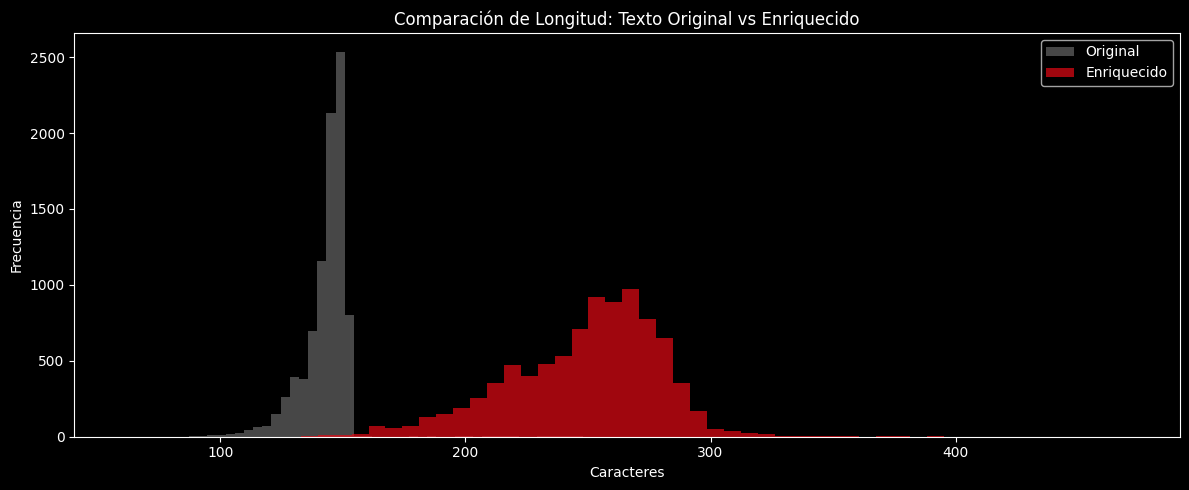

In [20]:
# Comparar longitudes
df['enriched_length'] = df['enriched_text'].apply(len)

print("📊 COMPARACIÓN: TEXTO ORIGINAL vs ENRIQUECIDO")
print("=" * 50)
print(f"\nLongitud promedio ORIGINAL: {df['desc_length'].mean():.0f} caracteres")
print(f"Longitud promedio ENRIQUECIDO: {df['enriched_length'].mean():.0f} caracteres")
print(f"\n📈 Incremento: {(df['enriched_length'].mean() / df['desc_length'].mean() - 1) * 100:.1f}% más información")

# Histograma comparativo
fig, ax = plt.subplots(figsize=(12, 5))
ax.hist(df['desc_length'], bins=50, alpha=0.7, label='Original', color='#666')
ax.hist(df['enriched_length'], bins=50, alpha=0.7, label='Enriquecido', color='#e50914')
ax.set_title('Comparación de Longitud: Texto Original vs Enriquecido')
ax.set_xlabel('Caracteres')
ax.set_ylabel('Frecuencia')
ax.legend()
plt.tight_layout()
plt.show()

## 6️⃣ Limpieza Final del Dataset

In [21]:
# Crear dataset limpio para el modelo
df_clean = df.copy()

# Rellenar nulos críticos
df_clean['description'] = df_clean['description'].fillna('')
df_clean['listed_in'] = df_clean['listed_in'].fillna('')
df_clean['director'] = df_clean['director'].fillna('')
df_clean['cast'] = df_clean['cast'].fillna('')
df_clean['country'] = df_clean['country'].fillna('')
df_clean['rating'] = df_clean['rating'].fillna('Not Rated')

# Eliminar títulos sin descripción (no útiles para NLP)
print(f"Títulos antes de limpieza: {len(df_clean)}")
df_clean = df_clean[df_clean['description'].str.len() > 10]
print(f"Títulos después de limpieza: {len(df_clean)}")
print(f"Eliminados: {len(df) - len(df_clean)} títulos sin descripción útil")

Títulos antes de limpieza: 8807
Títulos después de limpieza: 8807
Eliminados: 0 títulos sin descripción útil


In [22]:
# Verificar calidad final
print("\n✅ VERIFICACIÓN FINAL DEL DATASET LIMPIO")
print("=" * 50)
print(f"\nTotal de títulos: {len(df_clean)}")
print(f"Columnas disponibles: {list(df_clean.columns)}")
print("\nNulos restantes:")
print(df_clean[['description', 'listed_in', 'director', 'cast', 'enriched_text']].isnull().sum())


✅ VERIFICACIÓN FINAL DEL DATASET LIMPIO

Total de títulos: 8807
Columnas disponibles: ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description', 'desc_length', 'desc_words', 'decade', 'enriched_text', 'enriched_length']

Nulos restantes:
description      0
listed_in        0
director         0
cast             0
enriched_text    0
dtype: int64


## 7️⃣ Conclusiones y Recomendaciones

In [23]:
print("""
╔══════════════════════════════════════════════════════════════════════════════╗
║                    📋 CONCLUSIONES DEL ANÁLISIS                              ║
╠══════════════════════════════════════════════════════════════════════════════╣
║                                                                              ║
║  🎯 COLUMNAS PARA EL MODELO DE RECOMENDACIÓN:                                ║
║                                                                              ║
║     1. description  → Base principal para TF-IDF, Doc2Vec, SBERT             ║
║     2. listed_in    → Géneros (esencial para clasificación)                  ║
║     3. director     → Añade contexto (mismo director = similar estilo)       ║
║     4. cast         → Actores (mismo actor = posible conexión)               ║
║                                                                              ║
║  ⚠️ COLUMNAS CON MUCHOS NULOS (tratamiento especial):                        ║
║                                                                              ║
║     - director: 30% nulos → Usar cuando disponible                           ║
║     - cast: 9% nulos → Usar cuando disponible                                ║
║     - country: 9% nulos → Opcional                                           ║
║                                                                              ║
║  ✅ PROPUESTA: TEXTO ENRIQUECIDO                                              ║
║                                                                              ║
║     enriched_text = description + géneros + director + actores               ║
║                                                                              ║
║     Esto permite que TF-IDF encuentre películas por:                         ║
║       • Mismo tema/trama (descripción)                                       ║
║       • Mismo género                                                         ║
║       • Mismo director                                                       ║
║       • Mismos actores                                                       ║
║                                                                              ║
╚══════════════════════════════════════════════════════════════════════════════╝
""")


╔══════════════════════════════════════════════════════════════════════════════╗
║                    📋 CONCLUSIONES DEL ANÁLISIS                              ║
╠══════════════════════════════════════════════════════════════════════════════╣
║                                                                              ║
║  🎯 COLUMNAS PARA EL MODELO DE RECOMENDACIÓN:                                ║
║                                                                              ║
║     1. description  → Base principal para TF-IDF, Doc2Vec, SBERT             ║
║     2. listed_in    → Géneros (esencial para clasificación)                  ║
║     3. director     → Añade contexto (mismo director = similar estilo)       ║
║     4. cast         → Actores (mismo actor = posible conexión)               ║
║                                                                              ║
║  ⚠️ COLUMNAS CON MUCHOS NULOS (tratamiento especial):                        ║
║                            

In [24]:
# Guardar dataset limpio
df_clean.to_csv('../data/netflix_titles_clean.csv', index=False)
print("✅ Dataset limpio guardado en: data/netflix_titles_clean.csv")

✅ Dataset limpio guardado en: data/netflix_titles_clean.csv
